# ML - HW5 - Q5
# Ali Khoramfar - 810102129

# Import libraries

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data

## Load the Fashion-MNIST 

In [9]:
mnist = fetch_openml('Fashion-MNIST', version=1)
X = mnist.data
y = mnist.target.astype(int)

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
X_array = X.to_numpy()
print("Shape of X_array:", X_array.shape)  # Should be (number_of_samples, 784)

Shape of X_array: (70000, 784)


## EDA

In [4]:
print(f"Shape of data: {X_array.shape}")

Shape of data: (70000, 784)


## Plotting image from each label

In [11]:
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [15]:
unique_labels = np.unique(y)
images_per_label = {label: None for label in unique_labels}

for label in unique_labels:
    label_index = np.where(y == label)[0][0]
    images_per_label[label] = X_array[label_index].reshape(28, 28)

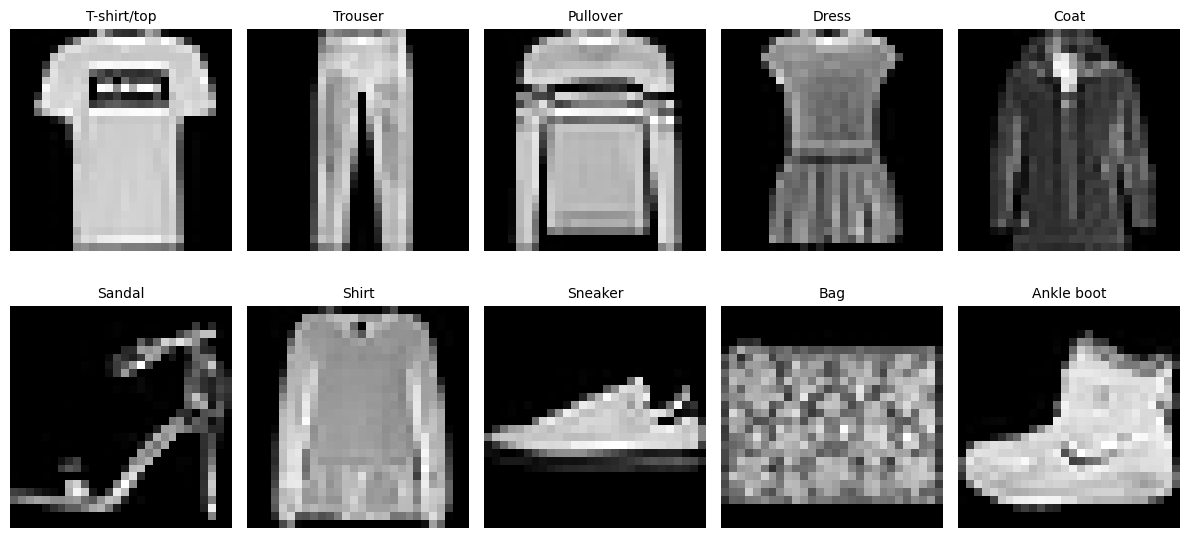

In [16]:
plt.figure(figsize=(12, 6))
for idx, (label, image) in enumerate(images_per_label.items()):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"{label_names[label]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Plot one random image

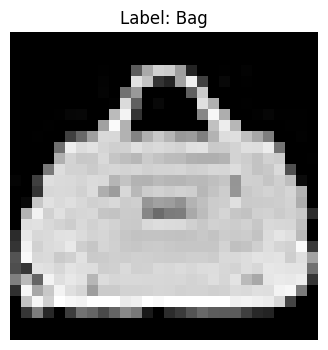

In [37]:
random_index = np.random.randint(0, X_array.shape[0])
random_image = X_array[random_index].reshape(28, 28)
random_label = y[random_index]

plt.figure(figsize=(4, 4))
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {label_names[random_label]}", fontsize=12)
plt.axis('off')
plt.show()

# Standardization 

In [56]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_array)

# Covariance matrix

In [57]:
cov_matrix = np.cov(X_standardized.T)

print("Covariance matrix shape:", cov_matrix.shape)

Covariance matrix shape: (784, 784)


# Eigenvalues and Eigenvectors

In [58]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

### Sort eigenvalues and eigenvectors

In [59]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

### Plot eigenvalues

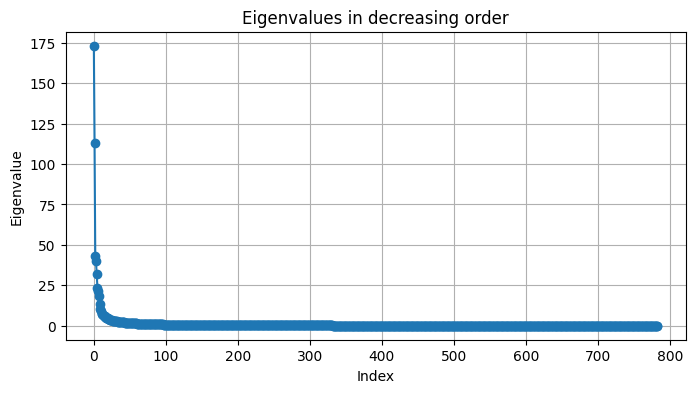

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(eigenvalues_sorted, marker='o')
plt.title("Eigenvalues in decreasing order")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

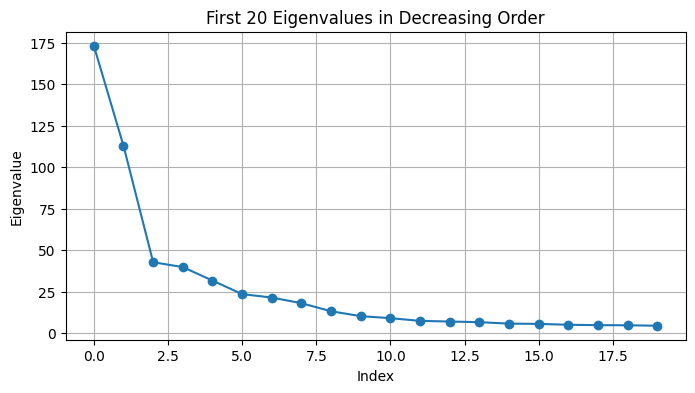

In [72]:
plt.figure(figsize=(8, 4))
plt.plot(eigenvalues_sorted[:20], marker='o')
plt.title("First 20 Eigenvalues in Decreasing Order")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

### Cumulative Explained Variance

In [62]:
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

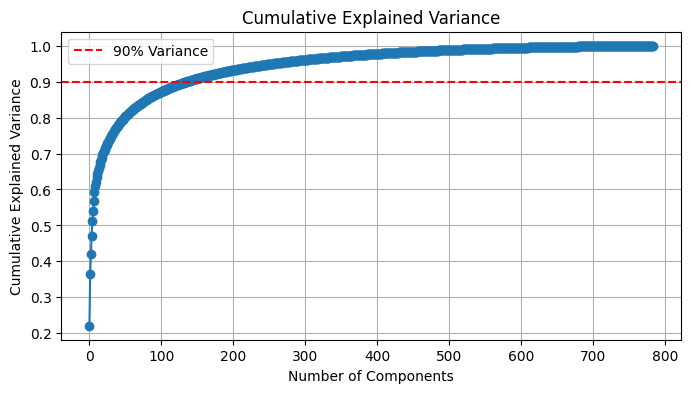

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(cumulative_explained_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.legend()
plt.grid(True)
plt.show()

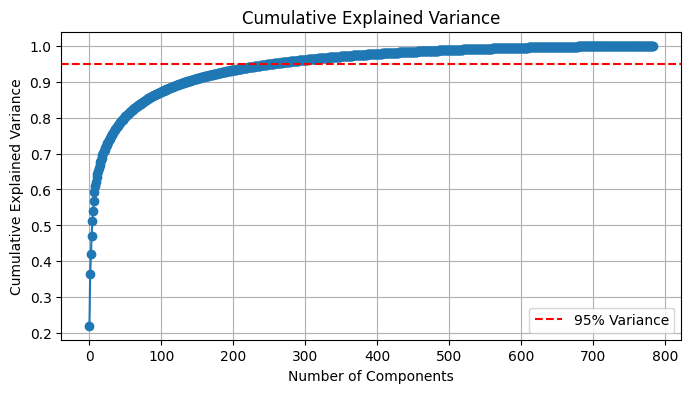

In [73]:
plt.figure(figsize=(8, 4))
plt.plot(cumulative_explained_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Number of components to keep 90% variance: {n_components}")

Number of components to keep 90% variance: 137


In [65]:
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to keep 95% variance: {n_components}")

Number of components to keep 95% variance: 256


## Apply PCA (Our Implementation)

### Top 256 eigenvectors

In [66]:
n_components = 256
selected_eigenvectors = eigenvectors_sorted[:, :n_components]

### Project to eigenvectors

In [67]:
X_pca = np.dot(X_standardized, selected_eigenvectors)

## Reconstruct

In [68]:
X_reconstructed = np.dot(X_pca, selected_eigenvectors.T)
original_image = X_array[0].reshape(28, 28)
original_image_standard = X_standardized[0].reshape(28, 28)
reconstructed_image = X_reconstructed[0].reshape(28, 28)

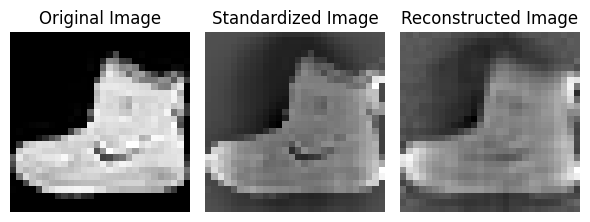

In [69]:
plt.figure(figsize=(6, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(original_image_standard, cmap='gray')
plt.title("Standardized Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## Different Number of Components

In [70]:
components_list = [50, 100, 137, 200, 256]

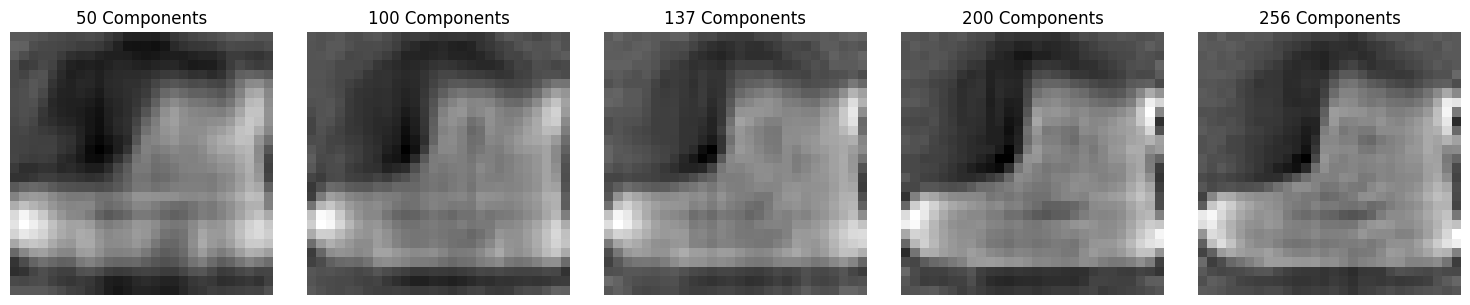

In [71]:
plt.figure(figsize=(15, 3))

for i, n_components in enumerate(components_list):
    selected_eigenvectors = eigenvectors_sorted[:, :n_components]
    X_pca = np.dot(X_standardized, selected_eigenvectors)
    X_reconstructed = np.dot(X_pca, selected_eigenvectors.T)
    reconstructed_image = X_reconstructed[0].reshape(28, 28)
    
    plt.subplot(1, len(components_list), i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"{n_components} Components")
    plt.axis('off')

plt.tight_layout()
plt.show()